# Python - Exploratory Data Analysis on Spotify 2023 Dataset

GUIDE QUESTIONS:

Overview of Dataset
-How many rows and columns does the dataset contain?
- What are the data types of each column? Are there any missing values?

Basic Descriptive Statistics
- What are the mean, median, and standard deviation of the streams column?
- What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?
  
 Top Performers
- Which track has the highest number of streams? Display the top 5 most streamed tracks.
- Who are the top 5 most frequent artists based on the number of tracks in the dataset?
  
 Temporal Trends
- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?
  
 Genre and Music Characteristics
- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
- Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
  
 Platform Popularity
- How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?
- 
 Advanced Analysis
- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
- Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

In [1]:
# Start
# Import all the necessary libraries for the Exploratory Data Analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file, specifying the encoding to handle special characters
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Display the first five rows of the dataframe
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
# Display the first last five rows of the dataframe
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


### Overview of Dataset

#### How many rows and columns does the dataset contain?

In [3]:
# Use pandas to identify the number of rows and the number of columns

# Identify the number of rows
print ("Rows:", df.shape[0])
print ("Columns:", df.shape[1])

Rows: 953
Columns: 24


#### What are the data types of each column? Are there any missing values?

In [4]:
# Identify the number of data types in each column
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [5]:
# Check for missing values in each column
print(df.isnull().sum())  

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [6]:
# In this spreadsheet, we can see that the key "C" is not found in any of the songs, and there are song that has a missing key 
# This is an obvious pattern because C major is one of the most common key in songwriting
# Use pandas to fill every song that has a missing key with "C"
df.iloc[:, 15] = df.iloc[:, 15].fillna("C")

### Basic Descriptive Statistics


In [7]:
# Summary statistics for numerical columns
print(df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

#### What are the mean, median, and standard deviation of the streams column?

In [8]:
# Convert the 'streams' column to numeric, setting errors='coerce' to turn non-numeric values to NaN
df.loc[:, 'streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the statistics and round to 2 decimal places
# Calculate the mean
mean_streams = round(df['streams'].mean(), 2)
# Calculate the median
median_streams = round(df['streams'].median(), 2)
# Calculate the mode
std_streams = round(df['streams'].std(), 2)

# Display the output
print ("Mean of the number of streams:", mean_streams)
print ("Median of the number of streams:", median_streams)
print ("Standard Deviation of the number of streams:", std_streams)

Mean of the number of streams: 514137424.94
Median of the number of streams: 290530915.0
Standard Deviation of the number of streams: 566856949.04


#### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

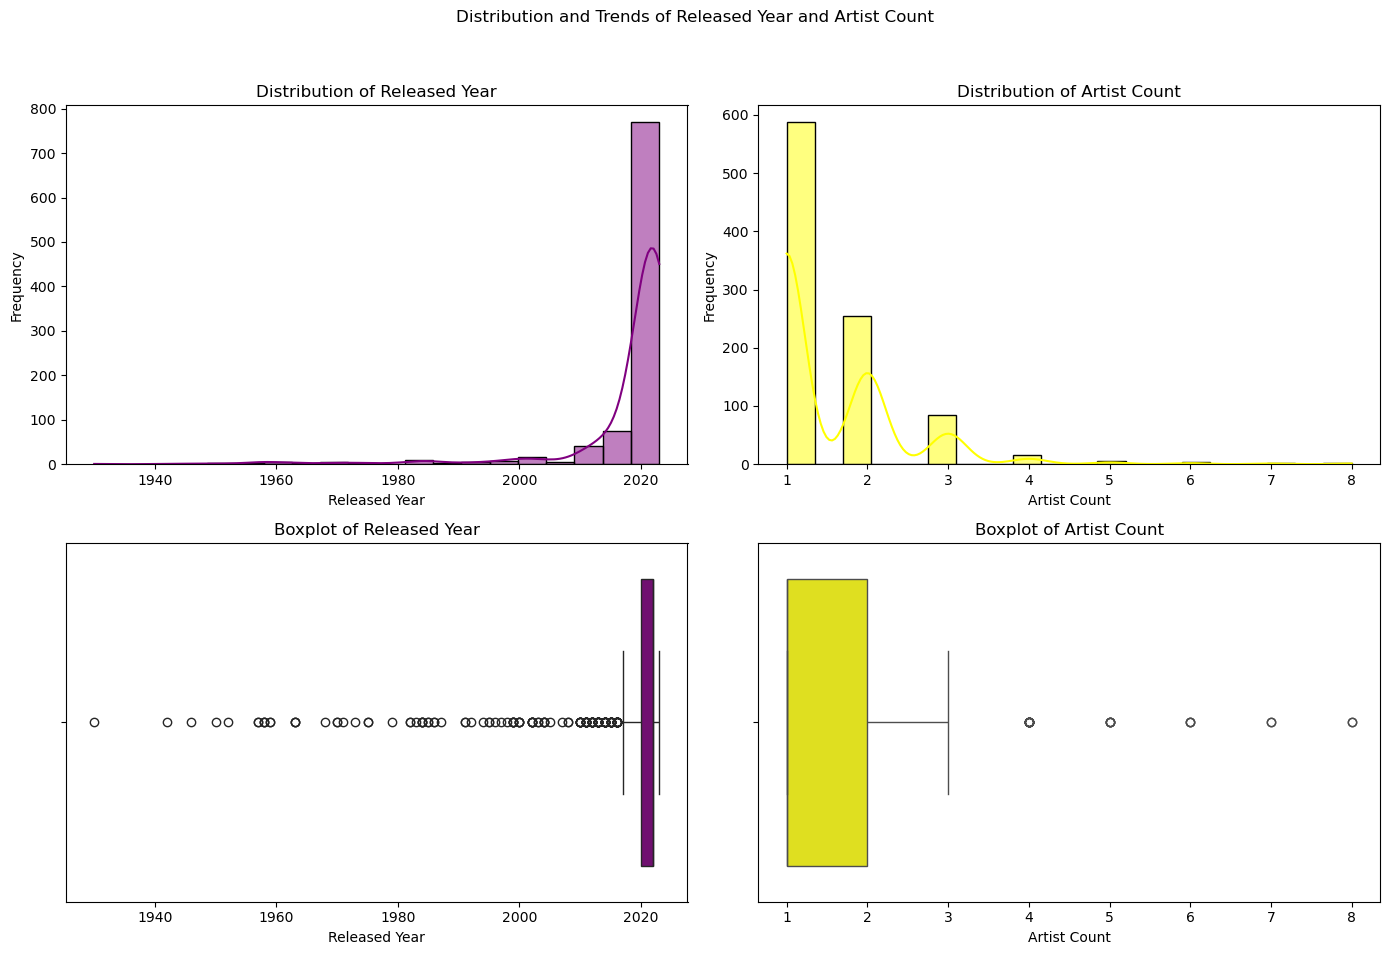

In [9]:
# Using seaborn, set up a figure with a 2x2 grid of subplots, specifying the figure size for better visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Adding a title for the entire figure
fig.suptitle('Distribution and Trends of Released Year and Artist Count')

# Plotting a histogram for 'released_year' with 20 bins, enabling kernel density estimation (KDE), and setting color
sns.histplot(df['released_year'], bins=20, kde=True, ax=axes[0, 0], color='purple')
# Setting the title, x-axis, and y-axis labels for the released_year histogram
axes[0, 0].set_title('Distribution of Released Year')
axes[0, 0].set_xlabel('Released Year')
axes[0, 0].set_ylabel('Frequency')

# Plotting a histogram for 'artist_count' with 20 bins, enabling KDE, and setting a different color
sns.histplot(df['artist_count'], bins=20, kde=True, ax=axes[0, 1], color='yellow')
# Setting the title, x-axis, and y-axis labels for the artist_count histogram
axes[0, 1].set_title('Distribution of Artist Count')
axes[0, 1].set_xlabel('Artist Count')
axes[0, 1].set_ylabel('Frequency')

# Creating a boxplot for 'released_year' to show data distribution, trends, and outliers
sns.boxplot(x=df['released_year'], ax=axes[1, 0], color='purple')
# Setting the title and x-axis label for the released_year boxplot
axes[1, 0].set_title('Boxplot of Released Year')
axes[1, 0].set_xlabel('Released Year')

# Creating a boxplot for 'artist_count' to show data distribution, trends, and outliers
sns.boxplot(x=df['artist_count'], ax=axes[1, 1], color='yellow')
# Setting the title and x-axis label for the artist_count boxplot
axes[1, 1].set_title('Boxplot of Artist Count')
axes[1, 1].set_xlabel('Artist Count')

# Adjusting layout to reduce overlap and improve appearance; adding space for the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Displaying the plots
plt.show()

- In the table above we can conlude that music from the 20th century has been streamed the most, from this we can also conclude that music from the 19th century are considered as outliers. By observing the distribution of artist count, we can tell that solo artists has been the most dominant  followed by duo, and trio which are mostly features and collaborations. We can conclude that bands with 3 or more members have been outliers

### Top Performers


#### Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [10]:
# Finding the top 5 tracks by streams
top_tracks = df.sort_values(by='streams', ascending=False).head(5)

# Display the output
print("Top 5 Most Streamed Tracks:")
print(top_tracks[['track_name', 'streams']])

Top 5 Most Streamed Tracks:
                                        track_name       streams
55                                 Blinding Lights  3703895074.0
179                                   Shape of You  3562543890.0
86                               Someone You Loved  2887241814.0
620                                   Dance Monkey  2864791672.0
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550.0


#### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [11]:
# Create a Series containing artist counts
artist_counts = df['artist(s)_name'].value_counts()

# Convert the Series to a DataFrame
top_5_artists_df = artist_counts.nlargest(5).reset_index()

# Rename the columns for clarity
top_5_artists_df.columns = ['artist(s)_name', 'track_count']

# Display the output
print (top_5_artists_df)

  artist(s)_name  track_count
0   Taylor Swift           34
1     The Weeknd           22
2      Bad Bunny           19
3            SZA           19
4   Harry Styles           17


### Temporal Trends


#### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

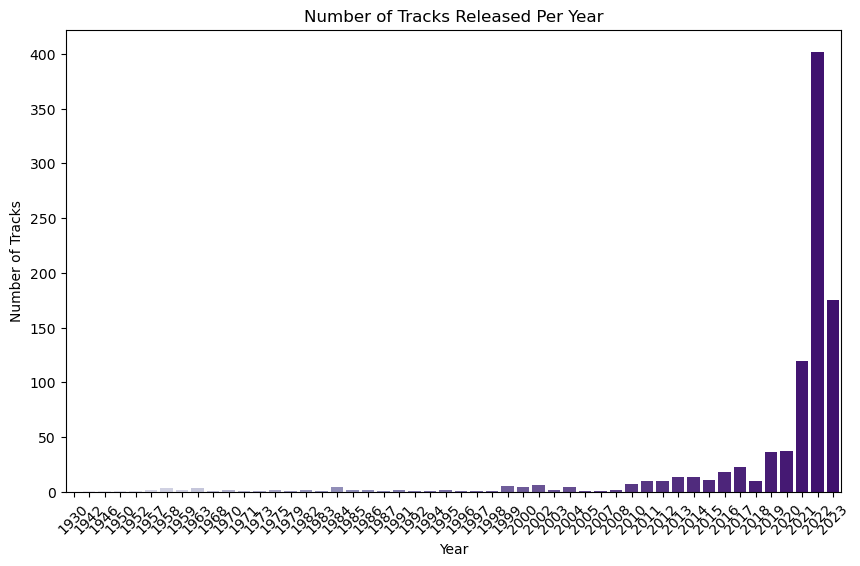

In [12]:
# Plot the number of tracks released per year

# Setting the figure size to make the plot larger and easier to read
plt.figure(figsize=(10, 6))

# Creating a count plot to show the number of tracks released per year
sns.countplot(x='released_year', data=df, palette="Purples", hue='released_year', dodge=False, legend=False)

# Setting the title of the plot to indicate the visualization purpose
plt.title('Number of Tracks Released Per Year')

# Labeling the x-axis to show it's representing years
plt.xlabel('Year')

# Labeling the y-axis to indicate it's showing the count of tracks released
plt.ylabel('Number of Tracks')

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

 - From the table above, we can conclude that most of the tracks in the dataframe are songs from the 2020 onwards.

##### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?


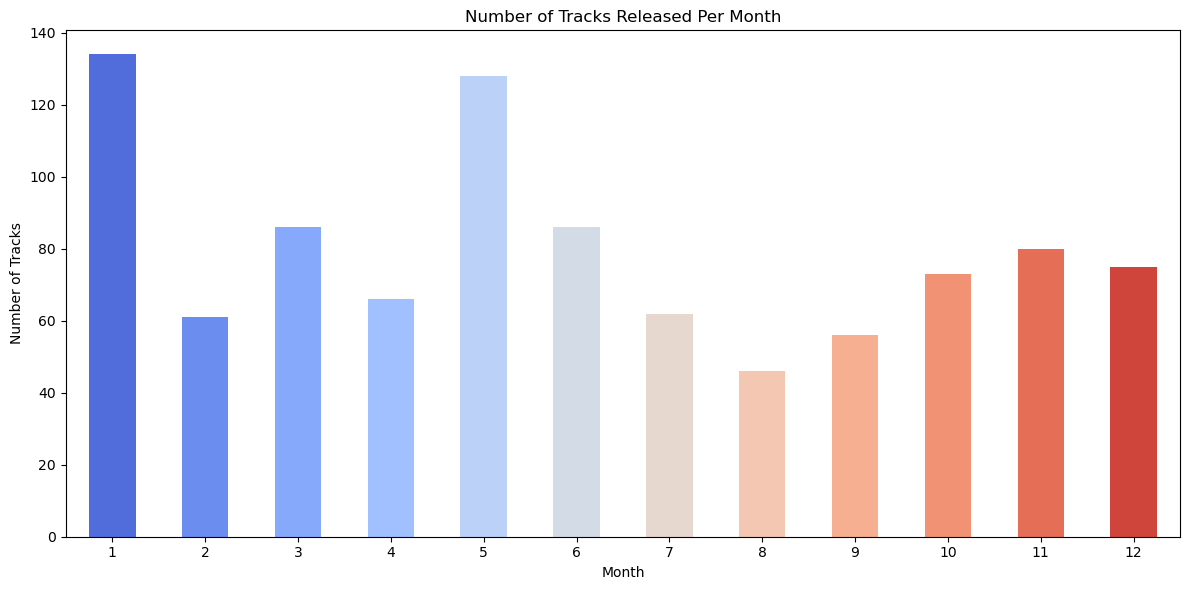

In [13]:
# Group the data by 'released_month' and count the tracks

# Create a Series where the index is 'released_month' and values are track counts
tracks_per_month = df.groupby('released_month').size()

# Creating a diverging color palette with as many colors as there are months (in 'tracks_per_month')
colors = sns.color_palette("coolwarm", len(tracks_per_month))

# Setting up the figure size for the bar plot to make it large and readable
plt.figure(figsize=(12, 6))

# Plotting the track counts per month as a bar plot, using custom colors from the palette
# - kind='bar' specifies that the plot type should be a bar chart
# - color=colors applies the diverging color palette to the bars
tracks_per_month.plot(kind='bar', color=colors)

# Adding a title to describe the plot’s purpose
plt.title('Number of Tracks Released Per Month')

# Labeling the x-axis to indicate it's showing the months of release
plt.xlabel('Month')

# Labeling the y-axis to indicate it's showing the count of tracks released
plt.ylabel('Number of Tracks')

# Rotating x-axis labels to 360 degrees (essentially no rotation) for horizontal readability
plt.xticks(rotation=360)

# Adjusting the layout to ensure all elements fit well within the figure
plt.tight_layout()

# Displaying the plot
plt.show()

- From the table above, we can conlude that the Month of January has the most releases, this could be because record labels prefer to release their predicted hit songs as a way to jumpstart a year. 

### Genre and Music Characteristics

#### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. 
#### Which attributes seem to influence streams the most?

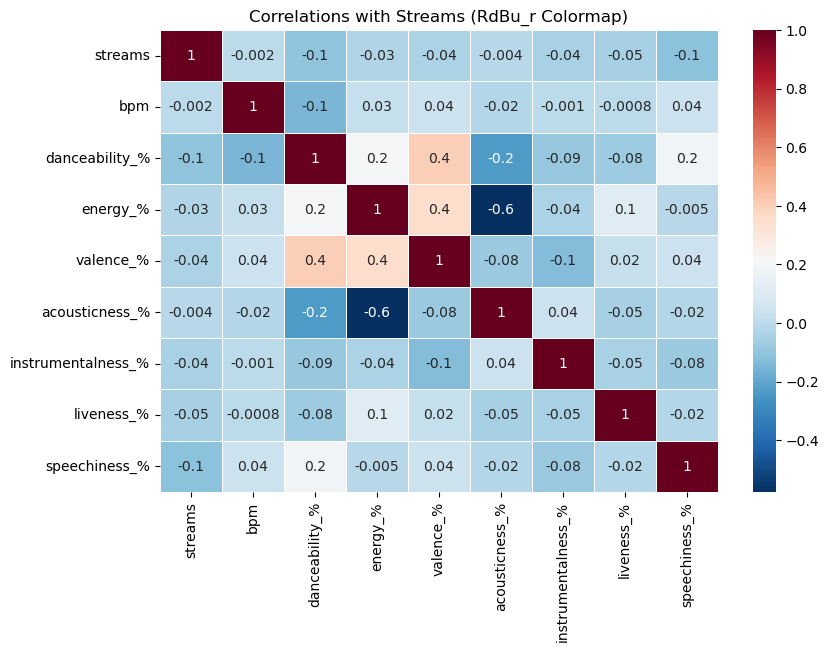

In [14]:
# Correlation between streams and musical attributes

# List of musical attributes to correlate with streams
musical_attributes = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Compute correlation matrix for streams and specified musical attributes
correlations = df[['streams'] + musical_attributes].corr()

# Set the figure size for the heatmap plot
plt.figure(figsize=(9, 6))

# Plot the heatmap of the correlation matrix with annotations and a contrasting colormap
sns.heatmap(correlations, annot=True, cmap="RdBu_r", fmt=".1g", linewidths=0.5)

# Add title to the heatmap for clarity
plt.title("Correlations with Streams (RdBu_r Colormap)")

# Display the heatmap
plt.show()

- The heatmap shows that all musical attributes have a weak negative correlation with the number of streams a track receives. Among these, speechiness has the strongest inverse relationship with streams, meaning that tracks with lower speechiness tend to have slightly higher stream counts.

#### Is there a correlation between danceability_% and energy_%? 

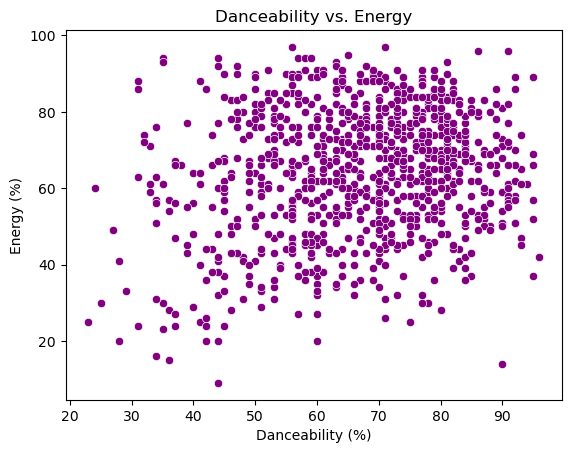

In [15]:
# Create a scatter plot with purple markers
sns.scatterplot(x='danceability_%', y='energy_%', data=df, color='purple')

# Add a title to the plot
plt.title('Danceability vs. Energy')

# Label the x-axis
plt.xlabel('Danceability (%)')

# Label the y-axis
plt.ylabel('Energy (%)')

# Display the plot
plt.show()

- The scattered points suggest there isn't a clear link between danceability and energy, meaning they might not be strongly related in the given dataset.

#### How about valence_% and acousticness_%?

Correlation between valence_% and acousticness_%: -0.08190727483082758


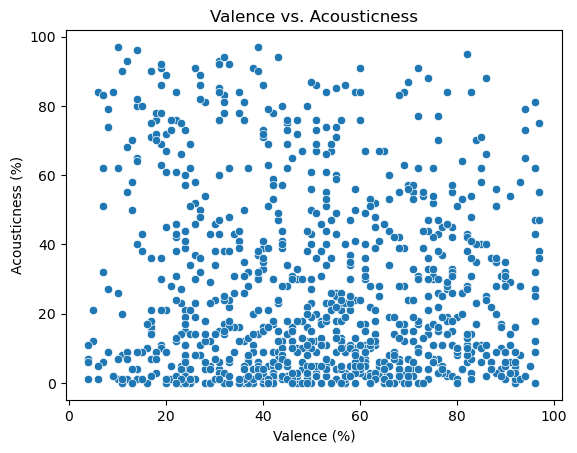

In [16]:
# Calculate the correlation coefficient

# This measures the linear relationship between these two variables in the DataFrame 'df'
correlation = df['valence_%'].corr(df['acousticness_%'])

# Printing the calculated correlation to understand the strength and direction of the relationship
print("Correlation between valence_% and acousticness_%:", correlation)

# Creating a scatter plot to visually examine the relationship between 'valence_%' and 'acousticness_%'
sns.scatterplot(x='valence_%', y='acousticness_%', data=df)

# Adding a title to describe the purpose of the scatter plot
plt.title('Valence vs. Acousticness')

# Labeling the x-axis to show it's representing 'valence_%' values
plt.xlabel('Valence (%)')

# Labeling the y-axis to show it's representing 'acousticness_%' values
plt.ylabel('Acousticness (%)')

# Displaying the scatter plot
plt.show()

- The points are widely scattered across the plot without a clear trend, suggesting that there is likely little to no correlation between valence and acousticness in this dataset.

### Platform Popularity

#### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare?

In [17]:
# Count the number of tracks in each playlist
spotify_playlists_count = df['in_spotify_playlists'].sum()
spotify_charts_count = df['in_spotify_charts'].sum()
apple_playlists_count = df['in_apple_playlists'].sum()

# Print the results
print("Number of tracks in Spotify playlists:", spotify_playlists_count)
print("Number of tracks in Spotify charts:", spotify_charts_count)
print("Number of tracks in Apple playlists:", apple_playlists_count)


Number of tracks in Spotify playlists: 4955719
Number of tracks in Spotify charts: 11445
Number of tracks in Apple playlists: 64625


#### Which platform seems to favor the most popular tracks?

- Based on the data above, the platform that seems to favor the most popular tracks is the spotify

### Advanced Analysis

#### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

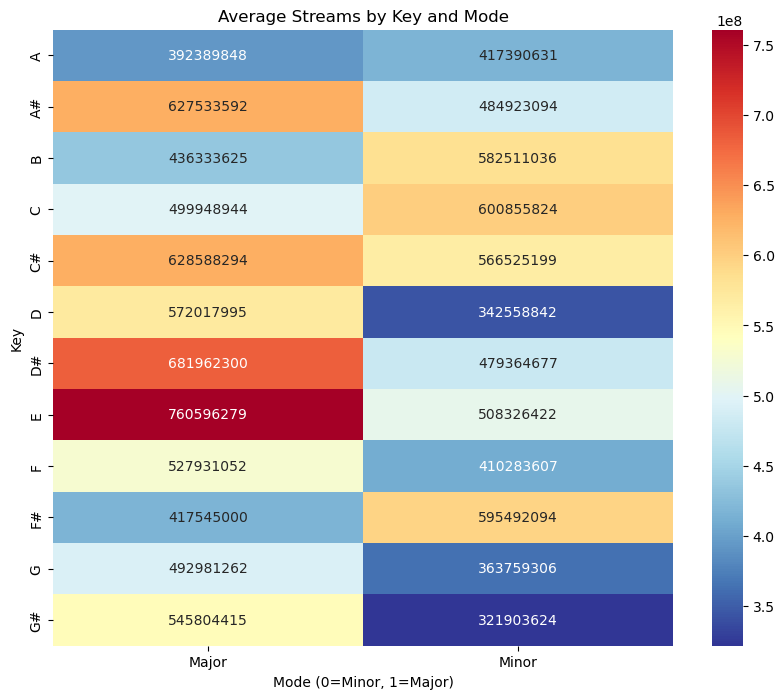

Tracks in Major mode have a higher total stream count.


In [19]:
# Calculating the average number of streams by 'key' and 'mode'

# groupby(['key', 'mode']) groups the data by 'key' and 'mode' values
# ['streams'].mean() calculates the average streams within each group
# unstack() reshapes the result to have 'key' as rows and 'mode' as columns for easier plotting
key_mode_patterns = df.groupby(['key', 'mode'])['streams'].mean().unstack()

# Filling any NaN values in the DataFrame with 0
# - inplace=True modifies 'df' directly
df.fillna(0, inplace=True)

# Inferring better data types for 'df' columns to optimize memory or operations
# - infer_objects attempts to find optimal data types, here without copying
df = df.infer_objects(copy=False)

# Creating a heatmap to visualize the average streams by 'key' and 'mode'
# - figsize sets the dimensions of the plot to 10x8 inches
plt.figure(figsize=(10, 8))

# Creating the heatmap from 'key_mode_patterns' data
# - annot=True displays the data values on each cell in the heatmap
# - fmt=".0f" formats the annotations to display as integers
# - cmap="RdYlBu_r" sets a red-yellow-blue color scheme, reversed for emphasis
sns.heatmap(key_mode_patterns, annot=True, fmt=".0f", cmap="RdYlBu_r")

# Adding a title to the heatmap
plt.title('Average Streams by Key and Mode')

# Labeling the x-axis to represent mode (0 for Minor, 1 for Major)
plt.xlabel('Mode (0=Minor, 1=Major)')

# Labeling the y-axis to represent the musical key
plt.ylabel('Key')

# Displaying the heatmap
plt.show()

# Calculating the total streams for tracks in Major mode
total_streams_major = key_mode_patterns['Major'].sum()

# Calculating the total streams for tracks in Minor mode
total_streams_minor = key_mode_patterns['Minor'].sum()

# Comparing total streams between Major and Minor modes
# Printing which mode has a higher total stream count or if they are equal
if total_streams_major > total_streams_minor:
    print("Tracks in Major mode have a higher total stream count.")
elif total_streams_major < total_streams_minor:
    print("Tracks in Minor mode have a higher total stream count.")
else:
    print("Tracks in Major and Minor modes have the same total stream count.")

- Based on the graph above, songs in Major mode are more streamed than Minor modes

#### Do certain genres or artists consistently appear in more playlists or charts? 
#### Perform an analysis to compare the most frequently appearing artists in playlists or charts.


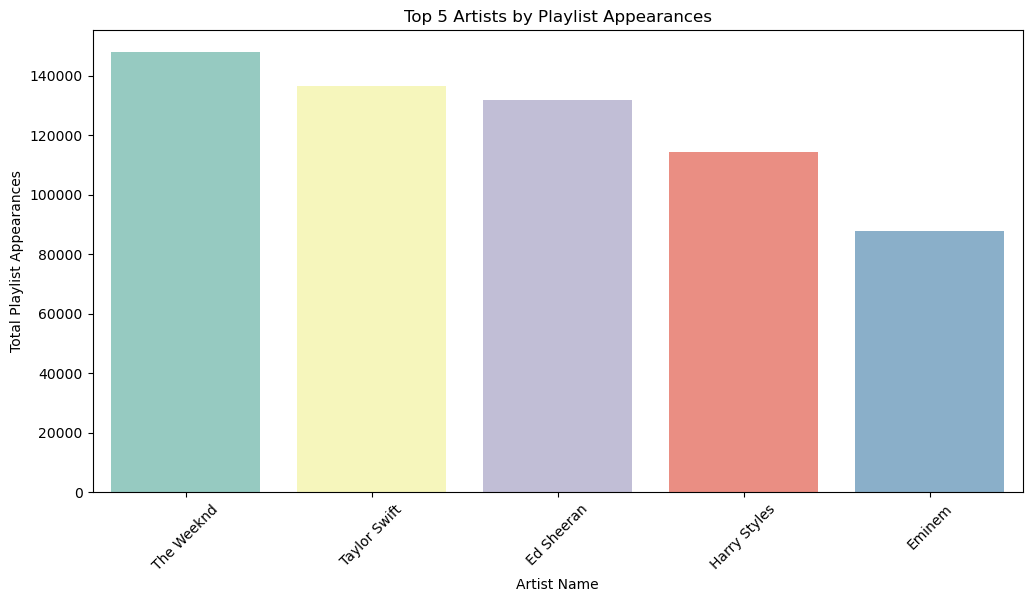

In [20]:
# Ensure columns used for playlist counts are numeric for aggregation
platform_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
# Iterate over each column in the platform_columns list
for col in platform_columns:
    # Check if the column exists in the DataFrame
    if col in df.columns:
        # Convert the column to numeric, handling potential errors
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')
    # If the column doesn't exist, do nothing (pass)
    else:
        pass

# Sum across specified columns to get 'total_playlists' and assign it to a new column in the DataFrame
df.loc[:, 'total_playlists'] = df[platform_columns].sum(axis=1)

# Top 5 artists by playlist appearances
# Group and ensure the sum is numeric to avoid TypeError
top_playlist_artists = df.groupby('artist(s)_name')['total_playlists'].sum().sort_values(ascending=False).head(5)

# Visualization of the Top 5 Artists by Playlist Appearances
plt.figure(figsize=(12, 6))

# Change the color palette here (replace "viridis" with your desired palette)
sns.barplot(x=top_playlist_artists.index, y=top_playlist_artists.values, hue=top_playlist_artists.index, palette="Set3", legend=False)
plt.title('Top 5 Artists by Playlist Appearances')
plt.xlabel('Artist Name')
plt.ylabel('Total Playlist Appearances')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

Unfortunately, the provided dataset does not include a 'genre' column. Therefore, a genre-based analysis is not feasible at this time. 
A genre column would allow us to identify trends and preferences across different musical genres.


In [ ]:
# End